# Proyek Akhir : Klasifikasi Gambar
#### Nama : Muhammad Haikal Rahman
#### Dicoding ID : haikal1231

#### **Ekstraksi data**

In [ ]:
from zipfile import ZipFile

In [ ]:
with ZipFile('drive/MyDrive/dicoding/data analyst/tugas1/rockpaperscissors.zip') as zipObj :
  zipObj.extractall('drive/MyDrive/dicoding/data analyst/tugas1')

#### **Pembagian dataset menjadi train set dan validation set menggunakan imagedatagenerator**

In [33]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tentukan path direktori dataset
dataset_dir = '/content/drive/MyDrive/dicoding/data analyst/tugas1/rockpaperscissors/rps-cv-images'

# Inisialisasi objek ImageDataGenerator
datagen = ImageDataGenerator(validation_split=0.401)  # 20% data akan digunakan untuk validation

# Muat data train dari direktori
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Ganti dengan ukuran yang sesuai
    batch_size=32,  # Sesuaikan dengan ukuran batch yang Anda inginkan
    class_mode='categorical',
    subset='training'  # Bagian ini adalah data train
)

# Muat data validation dari direktori
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(224, 224),  # Ganti dengan ukuran yang sesuai
    batch_size=32,  # Sesuaikan dengan ukuran batch yang Anda inginkan
    class_mode='categorical',
    subset='validation'  # Bagian ini adalah data validation
)

# Cek jumlah data pada train set dan validation set
print(f"Jumlah data train set: {train_generator.samples}")
print(f"Jumlah data validation set: {validation_generator.samples}")

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.
Jumlah data train set: 1312
Jumlah data validation set: 876


#### Train set

In [34]:
import pandas as pd

# Create dataframes from the lists
train_df = pd.DataFrame({'Image_Path': X_train, 'Label': y_train})
val_df = pd.DataFrame({'Image_Path': X_val, 'Label': y_val})

# Print the first few rows of the dataframes
print("Train Set:")
train_df.head()


Train Set:


,Image_Path,Label
0,/content/drive/MyDrive/dicoding/data analyst/t...,paper
1,/content/drive/MyDrive/dicoding/data analyst/t...,rock
2,/content/drive/MyDrive/dicoding/data analyst/t...,paper
3,/content/drive/MyDrive/dicoding/data analyst/t...,paper
4,/content/drive/MyDrive/dicoding/data analyst/t...,scissors


#### Validation set

In [35]:
print("\nValidation Set:")
val_df.head()


Validation Set:


,Image_Path,Label
0,/content/drive/MyDrive/dicoding/data analyst/t...,paper
1,/content/drive/MyDrive/dicoding/data analyst/t...,rock
2,/content/drive/MyDrive/dicoding/data analyst/t...,scissors
3,/content/drive/MyDrive/dicoding/data analyst/t...,scissors
4,/content/drive/MyDrive/dicoding/data analyst/t...,rock


# Menggunakan model sequential

In [8]:
import tensorflow as tf

# Membangun model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # Ubah jumlah unit sesuai dengan jumlah kelas
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Pelatihan model
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=len(X_val) // batch_size)

# Evaluasi model
model.evaluate(validation_generator)

Epoch 1/10
54/54 [==============================] - 747s 14s/step - loss: 0.7985 - accuracy: 0.6397 - val_loss: 0.3158 - val_accuracy: 0.8942
Epoch 2/10
54/54 [==============================] - 19s 355ms/step - loss: 0.2773 - accuracy: 0.9057 - val_loss: 0.1496 - val_accuracy: 0.9495
Epoch 3/10
54/54 [==============================] - 19s 358ms/step - loss: 0.2203 - accuracy: 0.9267 - val_loss: 0.1820 - val_accuracy: 0.9327
Epoch 4/10
54/54 [==============================] - 19s 352ms/step - loss: 0.1482 - accuracy: 0.9529 - val_loss: 0.0978 - val_accuracy: 0.9591
Epoch 5/10
54/54 [==============================] - 18s 336ms/step - loss: 0.1222 - accuracy: 0.9627 - val_loss: 0.0818 - val_accuracy: 0.9639
Epoch 6/10
54/54 [==============================] - 19s 350ms/step - loss: 0.1047 - accuracy: 0.9674 - val_loss: 0.0980 - val_accuracy: 0.9712
Epoch 7/10
54/54 [==============================] - 18s 339ms/step - loss: 0.0854 - accuracy: 0.9744 - val_loss: 0.0546 - val_accuracy: 0.9808


[0.04405013844370842, 0.9885844588279724]

#### **Hasil akurasi pelatihan model data 97%**

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

# Menyimpan data model

In [10]:
model.save('rock-paper-scissor_model.keras')

# Memprediksi sample gambar paper

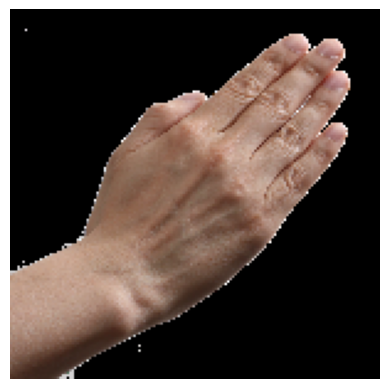

1/1 [==============================] - 0s 122ms/step
Predicted class: paper


In [17]:
import numpy as np
import matplotlib.pyplot as plt  # Import the matplotlib library
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# Load the pre-trained model
model = load_model('/content/rock-paper-scissor_model.keras')  # Provide the correct path to your model file

# Load and preprocess the sample image
sample_image_path = '/content/sample image/paper_0.png'
sample_image = load_img(sample_image_path, target_size=(150, 150))  # Adjust target size
sample_image = img_to_array(sample_image)
sample_image = sample_image / 255.0  # Rescale pixel values to [0, 1]
sample_image = np.expand_dims(sample_image, axis=0)  # Add a batch dimension

# Display the sample image
plt.imshow(sample_image[0])
plt.axis('off')  # Turn off axis labels
plt.show()

# Make predictions
predictions = model.predict(sample_image)
predicted_class_index = np.argmax(predictions)

# Map class index to class label
if predicted_class_index == 0:
    predicted_class = "paper"
elif predicted_class_index == 1:
    predicted_class = "rock"
elif predicted_class_index == 2:
    predicted_class = "scissors"
else:
    predicted_class = "unknown"  # Handle the case where the prediction is not one of the expected classes

print(f"Predicted class: {predicted_class}")
